# <center> Probability Theory Overview
## <center> Systems Engineering and Analysis
## <center> <img src="https://www.engr.colostate.edu/~jdaily/Systems-EN-CSU-1-C357.svg" width="400" /> 
### <center> Prepared by: Dr. Jeremy Daily

# Overview

This is a Jupyter Notebook that can present structured text through markdown, mathematics through $\LaTeX$, and operational Python source code. A fast way to run these notebooks is to download and install the Anaconda distribution of Python, which includes most of the math and science libraries needed to work with the tools in this notebook.

https://www.anaconda.com/products/individual#Downloads

If you are already familiar with Python, you can install the packages individually using pip.
```
pip install scipy matplotlib jupyter
```


In this notebook, we will explore the following topics:
1. Set theory and using sets built into Python to explore set membership and operations.
1. Venn Diagrams and visualizing sets.
1. Describing the likelihood of events using probability. 
1. Calculating event probability using distribution functions.
1. Monte Carlo Simulation and the Monty Hall problem.

# Set Theory
Set... A collection of events or outcomes.

Notation:

$\{\cdot\}$ represents an unordered set

$(\cdot)$ represents an ordered set

#### Examples
The set of integers: 
$$\mathbb{Z}=\{\dots, -3, -2, -1, 0, 1, 2, 3, \dots\}$$

The set of natural numbers:
$$\mathbb{N} = \{0,1,2,\dots\}$$

The set of real numbers: $$\mathbb{R}$$

The set of real numbers in 3-d space i.e. $(x,y,z)$: $$\mathbb{R}^3$$

The Null Set or Empty Set: $$\varnothing=\{\}$$

### Subsets and inclusion

$\mathbb{Z}_E$ is the set of even integers.

$\mathbb{Z}_O$ is the set of odd integers.

$\mathbb{S} = \{\mathbb{Z}_E,\mathbb{Z}_O\} = \mathbb{Z}$

Set inclusion:
$$\mathbb{N}\subset\mathbb{Z}$$

The symbol $\subset$ means subset or "is included in."

$$\emptyset \subset \mathbb{S}$$

We have set equality when $A \subset B$ and $B\subset A$


## Sets in Python 
Python 3 has unordered sets as a data type. We can use this capability to demonstrate some set theory operations and applications.

https://docs.python.org/3/library/stdtypes.html#set

In [1]:
# Let's make a couple sets to see if they are equal
setA = set("COLORADO")
print("setA:",setA)
setB = set("COLOR")
print("setB:",setB)
print("Is setA.issubset(setB)?", setA.issubset(setB))
print("Is setB.issubset(setA)?", setB.issubset(setA))
print("Is setA == setB?", setA == setB)

setA: {'R', 'O', 'C', 'A', 'L', 'D'}
setB: {'O', 'R', 'L', 'C'}
Is setA.issubset(setB)? False
Is setB.issubset(setA)? True
Is setA == setB? False


### Using $\LaTeX$ to typeset set math
Jupyter notebooks can accept $\LaTeX$ syntax to typeset mathematical expression. There are many on-line resources to learn and reference the $\LaTeX$ markup. For example:

https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols

Below is an example. The displayed syntax is preserved using triple ticks ` ``` `

```
$$A \supset B$$
```
$$A \supset B$$ means A is a superset of B or A contains B.

In [2]:
# Superset evaluations
print("setA:", setA )
print("setB:", setB )
print("Is A a superset of B?",setA.issuperset(setB) )
print("Is B a superset of A?",setB.issuperset(setA) )
# B does not contain A

setA: {'R', 'O', 'C', 'A', 'L', 'D'}
setB: {'O', 'R', 'L', 'C'}
Is A a superset of B? True
Is B a superset of A? False


#### Set Union
The union of two sets is a collection of all the elements in each set, without duplicates.

$$A \cup B$$ 
is an "OR" statement, A or B. This is also equivalent to adding sets together.

In [3]:
#declare a set with many data types
setA = set(["s",45, b'bytestring', ('tuple','s',45),"s"] )
setB = set("usa")
print("setA:", setA)
print("setB:", setB)

setA: {'s', ('tuple', 's', 45), 45, b'bytestring'}
setB: {'a', 's', 'u'}


In [4]:
## Union
setB.union(setA)

{('tuple', 's', 45), 45, 'a', b'bytestring', 's', 'u'}

In [5]:
# Order doesn't matter for unions
setA.union(setB) == setB.union(setA)

True

#### Set Intersection
The intersection of two sets is the set of common elements.

$$A\cap B$$

is an "and" statement, A AND B, which means the elements of the set need to exist in both sets.

In [6]:
# Determine common elements of the set with the intersection
setA.intersection(setB)

{'s'}

In [7]:
# Order doesn't matter for intersections
setA.intersection(setB) == setB.intersection(setA)

True

In [8]:
# The symmetric difference is the complement to the intersection
setA.symmetric_difference(setB)

{('tuple', 's', 45), 45, 'a', b'bytestring', 'u'}

### Venn Diagrams
Venn diagrams are useful in visualizing set membership, intersections, and unions.

To run the following block, you'll need to install the matplotlib-venn library.
This only needs to be done once. You can install the package by opening the Anaconda  Prompt from the Windows Start Menu.
At the prompt enter the following command:
```
 pip install matplotlib-venn
```

Or, you can use a magic command, as in the following cell.

see https://github.com/konstantint/matplotlib-venn for more examples and details.

https://pypi.org/project/matplotlib-venn/


In [9]:
%pip install matplotlib_venn

In [10]:
# If this import fails, be sure to install the package and restart the kernel.
from matplotlib_venn import venn2

{'s', ('tuple', 's', 45), 45, b'bytestring'}
{'a', 's', 'u'}


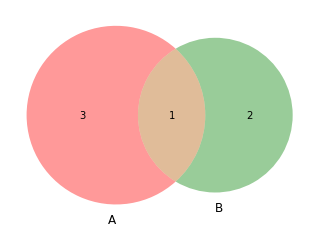

In [11]:
# This example draws circles with the number in A not B, 
# number in B not A, and number in A and B
print(setA)
print(setB)
venn2([setA,setB]);
## Putting a semi colon after venn2(); helps get rid of unnecessary text.

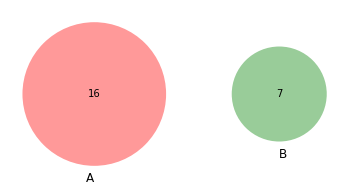

In [12]:
# If no elements in a set are in another, then they are mutually exclusive
venn2([set("0123456789ABCDEF"),set("ZYXWTUV")]);

Events that are **mutually exclusive** are such that their intersection is the empty set:
$$ A \cap B = \emptyset$$

### Compliments
The compliment is a "not" operation. If all events are contained in a sample space $\mathbb{S}$, then 
$$A \cup \overline{A} = \mathbb{S}$$
In English: event A and NOT event A are collectively exhaustive events. 

Keep in mind, event $\mathbb{S}$ must happen; it is the certain event.


## Transition to Probability Theory

Probability is the science and mathematics of reasoning about uncertain events.

The sample space $\mathbb{S}$ is the set of all possible outcomes of an experiment, which must be mutually exclusive and exhaustive.

An event $A$ is a set, where $A\in\mathbb{S}$, which can or does occur in an experiment.

We conduct an "experiment" which results in an event from the sample space. The probability laws explain the likelihood and anticipated frequency of the results of the experiment, as shown in the following sketch by Professor J. Cale.

<center> <img src="https://www.engr.colostate.edu/~jdaily/ExperimentToProbability.png" /> 


### Example: Roll of a 6-sided Die
All possible outcomes are defined by the discrete set:
$$\mathbb{S}=\{1,2,3,4,5,6\}$$
Let's define event A as an odd value being rolled. 
$$ A = \{1,3,5\}$$

In [13]:
# We'll need to use some of the tools in Numerical Python
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Define the sample space
sample_space = set(range(1,7))
sample_space

{1, 2, 3, 4, 5, 6}

In [15]:
odds = set([1,3,5])
odds

{1, 3, 5}

In [16]:
#check membership
odds.issubset(sample_space)

True

In [17]:
#Calculate Odds
evens = sample_space.difference(odds)
evens

{2, 4, 6}

In [18]:
# With equal likelihood for each member of the set, 
# then the event probability can be calculated as a ratio
P_evens = len(evens)/len(sample_space)
P_evens

0.5

In [19]:
labels, counts = np.unique(sorted(sample_space), return_counts=True)
labels

array([1, 2, 3, 4, 5, 6])

In [20]:
counts

array([1, 1, 1, 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Occurences for 1 die')

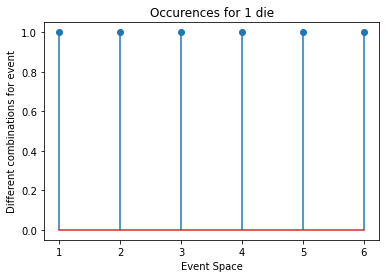

In [21]:
plt.stem(labels,counts)
plt.xlabel("Event Space")
plt.ylabel("Different combinations for event")
plt.title("Occurences for 1 die")

### Discrete Uniform Probability Law

If we have a sample space $\mathbb{S}$ with $|\mathbb{S}|$ equally likely outcomes, and an event A takes place in that sample space, then

$$P(A) = \frac{|A|}{|\mathbb{S}|}$$

where $|\cdot|$ represents the cardinality or count of the event.

So, the probability of rolling an odd is 

$$ P(\mathrm{odd}) = \frac{3}{6} = 0.5 $$

What about rolling 2 dice? What's the probability of getting a value less than 6?

In [22]:
sample_space = set()
dice_totals = []
events = set()
for die1 in range(1,7):
    for die2 in range(1,7):
        sample_space.add( (die1,die2) ) # order matters for a tuple
        dice_totals.append(die1+die2)
        events.add( die1+die2 )
print("There are {} values in the sample space".format(len(sample_space)))
print("There are {} mutually exhaustive and exclusive events in the sample space.".format(len(events)))

There are 36 values in the sample space
There are 11 mutually exhaustive and exclusive events in the sample space.


In [23]:
# Use the numerical python unique function to determine the distributions.
labels, counts = np.unique(dice_totals, return_counts=True)
labels

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [24]:
counts

array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Frequency distribution for 2 dice')

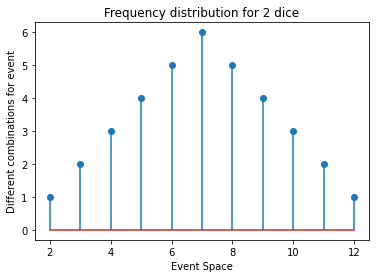

In [25]:
# Plot the space using a stem plot
plt.stem(labels,counts)
plt.xlabel("Event Space")
plt.ylabel("Different combinations for event")
plt.title("Frequency distribution for 2 dice")

Generally, if events are are disjoint, then 
$$ P(\underset{n}{\cup} A_i) = \sum_{i=1}^n P(A_i) $$
In other words, if the events are independent, then the probability of the set of the events is the sum of the probability of the individual events. This leads to a discussion of the axioms of probability.


In [26]:
#Probability of getting less than 6.
# The first 4 counts represent the independent combinations less than 6.
counts[:4].sum()/counts.sum()

0.2777777777777778

In [27]:
(1+2+3+4)/36

0.2777777777777778

In [28]:
10/36

0.2777777777777778

## Conditional Probability
Does the probability change if we know one of the die will show a known value?

What's the probability of getting less than 6 if one die shows 3?

This is conditional probability.

$$ P(A|B) = \frac{P(A \cap B)}{P(B)}$$

which says the probability of Event A given that Event B has already taken place is the probability of Event A and Event B divided by the probability of Event B.

For this example, Event B is one of the dice showing 3 dots and $P(B) = 2/6=1/3$ (2 dice at 1/6 probability). Event A is getting less than 6 for the dice counts. This means  $ A \cap B$ is the intersection of getting less than 6 and one die showing 3. 

For this to work, event A can mean the other die must show either a 1 or 2. So $P(A) = 1/3$.

Since the events are **independent**, the intersection can be computed with multiplication.

 $$ P(A \cap B ) = P(A) P(B) = \frac{1}{3}\times\frac{1}{3} = \frac{1}{9}$$

Therefore, the probability of getting a 6 or less with 2 dice when a 3 is already rolled is:

$$ P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{1/9}{1/3} = \frac{1}{3}$$


In [29]:
# Numerical calulation
(1/3) * (1/3) / (1/3)

0.3333333333333333

In [30]:
#Let's simulate tossing the dice
from scipy.stats import randint

In [31]:
N=1000000
die1 = randint.rvs(1,7,size=N)
die2 = randint.rvs(1,7,size=N)
toss = die1+die2

In [32]:
toss

array([4, 7, 9, ..., 4, 9, 6])

In [33]:
# We can get a 1 (or True) everywhere the toss is less than 6
toss < 6

array([ True, False, False, ...,  True, False, False])

In [34]:
#Compute how often one die has a 3
((die1==3).sum() + (die1==2).sum() )/(2*N)

0.1666635

In [35]:
#Determine the frequency of getting less than a 6
# Sum all the 1's and divide by the sample space
(toss < 6).sum()/N
#Should be close to 0.277777777

0.277711

In [36]:
#Compute the intersection 
die1_is_3_and_lt_6 = (die1==3)*(toss<6)
die1_is_3_and_lt_6.sum()

55364

In [37]:
#Caculate the intersection divided by the reduced sample space. 
die1_is_3_and_lt_6.sum()/(die1==3).sum()
#should be close to 0.33333333

0.3318408765336642

## Axioms of Probability

The mathematical theory of probability is derived from the following 3 axioms:

(Axioms are fundamental assumptions not subject to proofs.)

1. For every event contained in a sample space, the probability of the event is greater than or equal to zero.
$$\forall E \subset \mathbb{S}, P(E)\ge0$$ 

2. The probability of the certain event, $\mathbb{S}$ is 1.
$$P(\mathbb{S}) = 1$$

3. Given two mutually exclusive events, the probability of both happening is the sum of their individual probabilities 
$$ P(E_1 \cup E_2) = P(E_1) + P(E_2) $$

Combining axioms 1 and 2 gives the well-known fact that probabilities are between zero and one.

$$ 0\le P(E)\le 1$$

AND operations are intersections, and OR operations are unions. If the events are mutually exclusive, then we could add for a union and subtract for an intersection. However, when events are not mutually exclusive, we have to use the following:

$$P(A\cup B) = P(A) + P(B) - P(A\cap B)$$

When A and B are mutually exclusive, then the intersection is zero, which gives the third axiom of probability.

### Airplane Detection Problem
If an aircraft is present, the radar detects it 99% of the time.
If an aircraft is not present, then the radar gives a false alarm 10% of the time. 

There's only a 5% chance the aircraft is actually there. 

Events - A:{aircraft present}, B:{radar detects} 

Q1: What's the probability of no aircraft present and we get a false alarm?

$$P(\overline{A} \cap B) = P(\overline{A})P(B|\overline{A})$$
$$P(\overline{A} \cap B) = (0.95)(0.10) = 0.095$$

Q2: What's the probability of an aircraft present and with no alarm?

$$P(A \cap \overline{B}) = P(A)P(\overline{B}|A)$$
$$P(A \cap \overline{B}) = (0.05)(0.01) = 0.0005$$

In [38]:
P_BgivenA = 0.99
P_A = 0.05
P_notA = 1-P_A
P_notBgivenA = 1 - P_BgivenA
P_Bgiven_notA = .10
P_notBgiven_notA = 1 - P_Bgiven_notA

In [39]:
# Q1
P_notA*P_Bgiven_notA

0.095

In [40]:
#Q2
P_A*P_notBgivenA

0.0005000000000000004

### Total Probability
The law of total probability says you can sum all the mutually exclusive probabilities to get the total.

$$P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A}) $$

For this problem, the total probability is
$$P(B) = (0.99)(0.05) + (0.10)(0.95) = 0.1445$$



In [41]:
P_B = P_BgivenA*P_A + P_Bgiven_notA*P_notA
P_B

0.14450000000000002

### Bayes Rule
$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$
Q3: What is the probability the aircraft is actually present without a detection event?

$$ P(A|B) = \frac{(0.05)(0.99)}{0.1445} = 0.342$$

In [42]:
P_AgivenB = P_A*P_BgivenA/P_B
P_AgivenB

0.34256055363321797

## Probability for Random Variables

Events in the samples space $\mathbb{S}$ can be mapped to random variables $\mathbf{X}$. An specific instance of a random variable is written as the lowercase (i.e. $x$ where $x\in\mathbf{X}$). For example, a die landing with a marking showing two dots is the event that gets mapped to the discrete value of $x=2$. The sample space for $\mathbf{X}$ is $\mathbb{S}=\{1,2,3,4,5,6\}$.

### Discrete Random Variables
Discrete variables use a probability mass function (PMF) to describe the probability of certain events in the 
sample space. The PMF is defined as $$P_\mathbf{X}(x) := P(\{\mathbf{X}=x\})$$

For a discrete random variables $\mathbf{X}$:


$$ P(\{\mathbf{X} = x_i\}) = p(x_i) $$

$$ 0\le p(x_i) \le 1 $$

$$ \sum_{all x_i}p(x_i) = 1 $$

Here, $p(x_i)$ are the individual mass function values.

We'll often use distributions of the probability to describe the random variable. If the distribution and its parameters are known, then the random variable is fully defined. Many times, the challenge is to define the distribution in practical engineering problems.

Let's examine a discrete distribution built from a Bernoulli trial that models two tosses of a fair coin. The events are $\mathbb{S}=\{HH, HT, TH, TT\}$. The random variable is the number of heads that show. With two tosses, you can have 3 outcomes: x=0, x=1, and x=2. The sample space has a size of 4. 

A Bernoulli trial is a discrete random variable with only 2 independent outcomes: success or failure. The probability of success is $p$ and the probability of failure is $1-p$. For a fair coin, $p=0.5$.

When we combine many Bernoulli trials, we get a Binomial Distribution. 
$$ P_\mathbf{X}(k) = {n \choose k} p^k (1-p)^{n-k}$$ where  $k = 0,1,2,\dots,n$ and  ${n\choose k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient.

This distribution is built into Scientific Python: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [43]:
from scipy.stats import binom

In [44]:
#Two fair coins
for k in range(3):
    print(k,binom.pmf(k, n=2, p=0.5, loc=0))

0 0.25
1 0.5
2 0.25


[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101]
[0.00000000e+00 7.88860905e-31 7.88860905e-29 3.90486148e-27
 1.27558808e-25 3.09330110e-24 5.93913812e-23 9.40363535e-22
 1.26277389e-20 1.46797465e-19 1.50059631e-18 1.36554264e-17
 1.11726216e-16 8.28636101e-16 5.60922899e-15 3.48573516e-14
 1.99848816e-13 1.06169683e-12 5.24603142e-12 2.41900338e-11
 1.04399093e-10 4.22816327e-10 1.61072886e-09 5.78398092e-09
 1.96152396e-08 6.29322272e-08 1.91313971e-07 5.51867223e-07
 1.51252498e-06 3.94336870e-06 9.79043264e-06 2.31706906e-05
 5.23209142e-05 1.12816971e-04 2.32471335e-04 4.58105277e-04
 8.63855666e-04 1.55973940e-03 2

Text(0.5, 1.0, 'Binomial Distribution of 100 Coin Tosses')

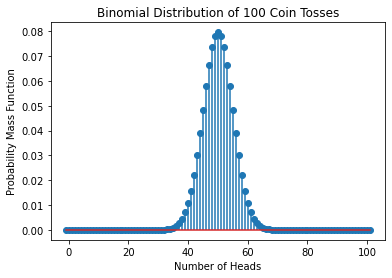

In [45]:
#What about 10 coins?
# uset the percent point function to get the whole space
n = 100 #Number of trials
p = 0.5 #probability of success (success = head)
x = np.arange(-1,n+2)
pmf_values =  binom.pmf(x, n, p)
print(x)
print(pmf_values)
plt.stem(x,pmf_values)
plt.xlabel("Number of Heads")
plt.ylabel("Probability Mass Function")
plt.title("Binomial Distribution of {} Coin Tosses".format(n))

In [46]:
#We can calculate the moments of the distribution too.
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('mean    ',mean)
print('variance',var)
print('skewness',skew)
print('kurtosis',kurt)
# Change n and p to see how they affect the expected values and moments.

mean     50.0
variance 25.0
skewness 0.0
kurtosis -0.02


#### Poisson Distribution
Another common discrete distribution for modeling "rare" events is the Poisson distribution.

https://en.wikipedia.org/wiki/Poisson_distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

Let's explore:

In [47]:
from scipy.stats import poisson

In [48]:
# Define the shape parameter
mu = 20.4
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('mean    ',mean)
print('variance',var)
print('skewness',skew)
print('kurtosis',kurt)

mean     20.4
variance 20.4
skewness 0.22140372138502384
kurtosis 0.04901960784313726


[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23.
 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.]
[1.38306018e-04 4.03063252e-04 1.02781129e-03 2.32970560e-03
 4.75259942e-03 8.81391165e-03 1.49836498e-02 2.35128043e-02
 3.42615148e-02 4.65956602e-02 5.94094667e-02 7.12913601e-02
 8.07968748e-02 8.67503287e-02 8.84853353e-02 8.59571828e-02
 7.97057514e-02 7.06955360e-02 6.00912056e-02 4.90344238e-02
 3.84731633e-02 2.90686122e-02 2.11785603e-02 1.48980218e-02
 1.01306548e-02 6.66662445e-03 4.24997309e-03 2.62725609e-03
 1.57635365e-03 9.18788987e-04 5.20647092e-04 2.87059478e-04
 1.54105614e-04 8.06090907e-05 4.11106362e-05]
PMF total:  0.9999080321251357


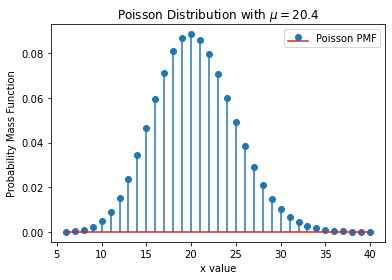

In [49]:
x = np.arange(poisson.ppf(0.0001, mu),
              poisson.ppf(0.9999, mu) + 2)

pmf_values =  poisson.pmf(x,mu)
print(x)
print(pmf_values)
print("PMF total: ", pmf_values.sum())
plt.stem(x, pmf_values,label='Poisson PMF')
plt.legend()
#plt.grid()
plt.xlabel("x value")
plt.ylabel("Probability Mass Function")
plt.title("Poisson Distribution with $\mu = {}$".format(mu));

## Expected Values
The mean value of a distribution is its expected value. The expected value is known as the first moment as its formula reflects a moment calculation from mechanics. 


$$ \mu = E(y) = \sum_{all y} y_i p(y_i)$$ for discrete variables. Here $E$ denotes the expected value operator.

The second moment is known as the variance. It is calculated with the expected value operator: 

$$ \sigma^2 = E[(y-\mu)^2]$$

The standard deviation, $\sigma$, is the square root of the variance.

In [50]:
# Example of computing the expected value for the variance
((x-mu)**2*pmf_values).sum()
# This should be close to the variance from the moment generation routine.

20.368897881635057

### Continuous Random Variables
In discrete systems, the event could be defined as a single value. However, the probability of an exact value happening for a continuous variable is zero. Therefore, meaningful events are described as intervals. 

$$ \mathrm{probability} = P(a\leq x \leq b)$$
where x is the the value from the random variable, $\mathbf{X}$, $a$ is the lower limit, and $b$ is the upper limit. Often the limits are $a=-\infty$ or $b=\infty$.

Let's say Event A is the value of x being less than 1.5 for a random variable $\mathbf{X}$ described using a Normal Distribution with a mean of $\mu=0.5$ and a standard deviation of $\sigma = 1.2$. The event is written as 

$$ x<1.5$$

we can write the probability of this event as

$$ P(x<1.5) $$

The compliment of this event is 

$$ x \geq 1.5$$

and the probability of the compliment is 

$$ P(x \geq 1.5)$$

The sample space is the set of real numbers and x exists in $\mathbb{R}$  ($x \in \mathbb{R}$).
Since the total probability is 1 and $x \in \mathbb{R}$, then P(Event A and not Event A) = 1, or

$$ P([x<1.5] \cup [x\geq 1.5]) = 1$$ 

In [51]:
# Import the normal distribution
from scipy.stats import norm

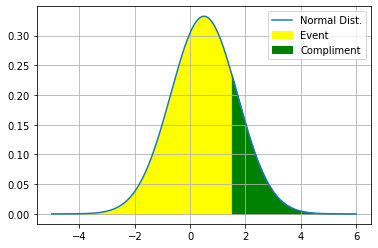

In [52]:
X1 = 1.5
x = np.linspace(-5,6,1000)
mu = 0.5
sigma = 1.2
y = norm.pdf(x, mu, sigma)
plt.plot(x,y ,label="Normal Dist.")
plt.grid()
plt.fill_between(x, 0, y, where = x < X1, color='yellow', label="Event")
plt.fill_between(x, 0, y, where = x >= X1, color='green', label="Compliment");
plt.legend()

### Calculating the event probability
There are two functions used to calculate probabilities of events based on probability distribution functions.

The first is called the cumulative probability function and the second is the survival function. 

See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html 

Let's see how these work. 

In [53]:
# Calculate the probability of x < 1.5
norm.cdf(1.5,mu, sigma)

0.7976716190363569

In [54]:
# Calculate the probability of x >= 1.5 using the survival function
norm.sf(1.5,mu,sigma)

0.20232838096364308

In [55]:
# Calculate the probability of x >= 1.5 using the cumulative distribution function
1-norm.cdf(1.5,mu,sigma)

0.20232838096364314

In [56]:
# The total probability is the probability of all the events. 
norm.cdf(1.5,mu,sigma) + norm.sf(1.5,mu,sigma)

1.0

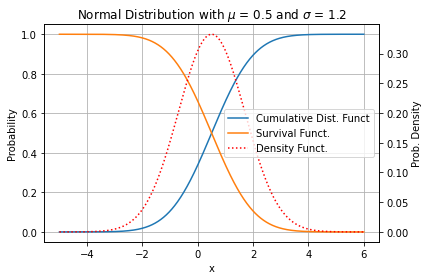

In [57]:
#Visualize the CDF and SF
#%matplotlib notebook
plt.plot(x,norm.cdf(x,mu,sigma),label="Cumulative Dist. Funct")
plt.plot(x,norm.sf(x,mu,sigma),label="Survival Funct.")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.grid()
plt.ylabel("Probability")
plt.xlabel('x')
plt.title("Normal Distribution with $\mu$ = {} and $\sigma$ = {}".format(mu,sigma))
newYaxis = plt.twinx()
plt.plot(x,norm.pdf(x,mu,sigma),'r:',label="Density Funct.")
plt.ylabel("Prob. Density")
new_ax = plt.gca()
new_handles, new_labels = new_ax.get_legend_handles_labels()
plt.legend(handles+new_handles, labels+new_labels, loc="center right");
plt.savefig('Normal(0.5,1.2).pdf')

### Exponential Distribution
There are many distributions in the SciPy.stats library. One example is the exponential distribution that may describe the survivability of electrical components.

$$ 
f_\mathbf{X}(x) = \left\{ 
\begin{array}{l} 
\lambda e^{-\lambda x} & x \ge 0 \\
0 & x \lt 0
\end{array} \right.
$$

According to https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html, the parameterization of $\lambda$ corresponds to using `scale = 1 / lambda`.



In [58]:
from scipy.stats import expon

In [59]:
lamb = .4 #lambda is a protected python function
mean, var, skew, kurt = expon.stats(scale = 1/lamb, moments='mvsk')
print('mean    ',mean)
print('variance',var)
print('skewness',skew)
print('kurtosis',kurt)

mean     2.5
variance 6.25
skewness 2.0
kurtosis 6.0


### Expectation
In general, we have expectation for continuous random variables as

$$\mu = E(y) = \int_{-\infty}^{\infty} y f(y) dy$$ for continuous random variables. It can be shown that for an exponential distribution,

$$E[y] = \mu = \frac{1}{\lambda}$$


Also, the second moment is the variance. It is calculated with the expected value operator: 
$$ \sigma^2 = E[(y-\mu)^2]$$

or

$$ \sigma^2 = \int_{-\infty}^{\infty} (y-\mu)^2 f(y) dy$$

Also, it can be shown that the variance for the exponential distribution is

$$\sigma^2 = \frac{1}{\lambda^2}$$

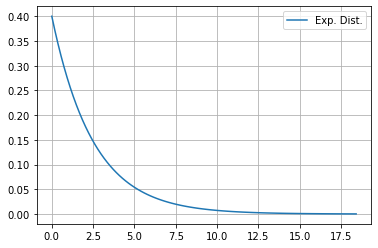

In [60]:
x = np.linspace(expon.ppf(0.00000001),

                expon.ppf(0.99999999), 100)
y = expon.pdf(x,scale=1/lamb)
plt.plot(x,y ,label="Exp. Dist.")
plt.legend()
plt.grid()

In [61]:
#numerical integration to estimate total probability
dx = x[18] - x[17]
sum = 0
for i in range(len(y)-1):
    sum += dx*(y[i]+y[i+1])/2 #trapezoid rule
sum

0.9998303195800251

In [62]:
# mean value:
1/lamb

2.5

In [63]:
# variance
1/lamb**2

6.249999999999999

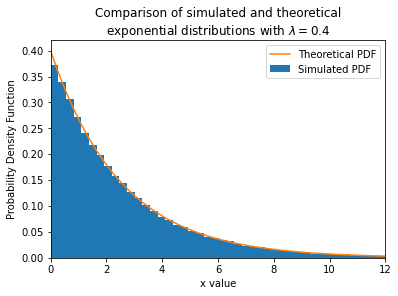

In [64]:
# Simulate the distribution
N = 100000
exp_samples = expon.rvs(scale = 1/lamb, size=N)
vals, bins, patches = plt.hist(exp_samples,bins=100,density=True, label="Simulated PDF")
y = expon.pdf(bins,scale=1/lamb)
plt.plot(bins,y,label="Theoretical PDF")
plt.legend();
ax = plt.gca()
ax.set_xlim([0,12])
plt.xlabel("x value")
plt.ylabel("Probability Density Function")
plt.title("Comparison of simulated and theoretical\nexponential distributions with $\lambda = {}$".format(lamb));

## Monte Carlo Simulation
Combining random variables using analytical methods can become intractable. Often we can get decent results by simulating the random variables and performing multiple calculations and analyzing the results in aggregate. 

What's the distribution look like if added  $k$ exponential distributions together?

$$ \mathbf{X} \sim \sum_{i=1}^k \mathbf{Y}_i $$ where $\mathbf{Y}_i \sim \mathrm{Expon}(\lambda)$.

What if these exponential distribution represent noise source distributions? This is an example of the central limit theorem.

Text(0.5, 1.0, 'Comparison of simulated result to a normal distribution')

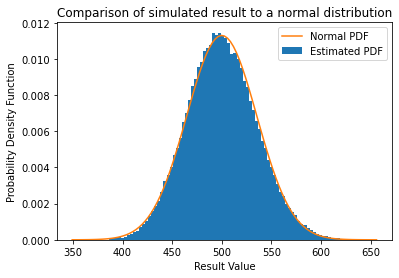

In [65]:
# Try changing the num_dists from 1 to 200. As the number increases, the 
N = 100000
num_dists = 200
Z = expon.rvs(scale=1/lamb, size=N)
for i in range(1,num_dists):
    Z += expon.rvs(scale=1/lamb, size=N)
vals, bins, patches = plt.hist(Z, bins=100, density=True, label="Estimated PDF")
y = norm.pdf(bins,loc=Z.mean(),scale=Z.std())
plt.plot(bins,y,label="Normal PDF")
plt.legend()
plt.xlabel("Result Value")
plt.ylabel("Probability Density Function")
plt.title("Comparison of simulated result to a normal distribution")

In [66]:
# Mean value calculated from samples
Z.mean()

499.93836768810985

In [67]:
# Theoretical mean
num_dists/lamb

500.0

In [68]:
# Variance from simulation
Z.var()

1246.071114229031

In [69]:
# Theoretical variance
num_dists/lamb**2

1249.9999999999998

### Intro to Monty Hall Problem

Monty Hall was a game show host in the 1970's. A brain teaser was named after his show. 

[Monty Hall Wiki](https://en.wikipedia.org/wiki/Monty_Hall_problem)

[Brooklyn99 Monty Hall](https://www.youtube.com/watch?v=QGxyIQzLeUc) is a sitcom discussing the Monty Hall Problem

In [70]:
#Let's Introduce the Monty Hall Problem Simulation
import random
prize_doors = []
N = 100000
for i in range (N):
    prize_doors.append(random.randint(1,3))
print (prize_doors[:20])

[3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 2, 2, 3, 1, 2, 1]


In [71]:
#If a contestent switches after picking the correct door initially,
# then they lose. Otherwise, it will be a win. 
loss = 0
win = 0
for i in range (N):
    contestant_choice = random.randint(1,3)
    if contestant_choice == prize_doors[i]:
        loss +=1
    else:
        win +=1
print("Winning Ratio:", win/N)
print("Loosing Ratio:", loss/N)

Winning Ratio: 0.66658
Loosing Ratio: 0.33342


Conclusion: Always switch to improve your odds when playing "Let's Make a Deal."

## Summary
In this notebook, we explored the following topics:
1. Set theory and using sets built into Python to explore set membership and operations.
2. Venn diagrams and visualizing sets.
3. Describing the likelihood of events using probability. 
3. Discrete and continuous distribution functions.
4. Calculating event probability using distribution functions.
5. Monte Carlo Simulation and the Monty Hall problem.